In [9]:
import time

from LocalPopular import generate_agents, calculate_euclidian_relationships, create_graph, locally_popular_clustering, \
    plot_clustering, plot_stuff, my_make_circles, create_graphs_euclid, create_graphs_kNN
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons
import numpy as np
from scipy.spatial import distance


In [2]:
"""Comparing Computing Time """
n= 500
print('Comparing Computing Time n =',n)

start = time.perf_counter()
agents = generate_agents(n,2)
initial_clustering = {i: i % 5 for i in range(len(agents))}

friend_graph_a,enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)



print('Created Graph (Euclidian relationships):', time.perf_counter() - start, 'seconds')

start = time.perf_counter()
locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B',use_first_move=True)
print('Created local popular solution using first legal move in', time.perf_counter() - start, 'seconds')
start = time.perf_counter()
locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B',use_first_move=False)
print('Created local popular solution using best move in', time.perf_counter() - start, 'seconds')


Comparing Computing Time n = 500
Created Graph (Euclidian relationships): 1.5289685 seconds
918
Created local popular solution using first legal move in 0.5359935999999994 seconds
505
Created local popular solution using best move in 0.4478786000000001 seconds


443
400
544
402
400
644
410
400
760


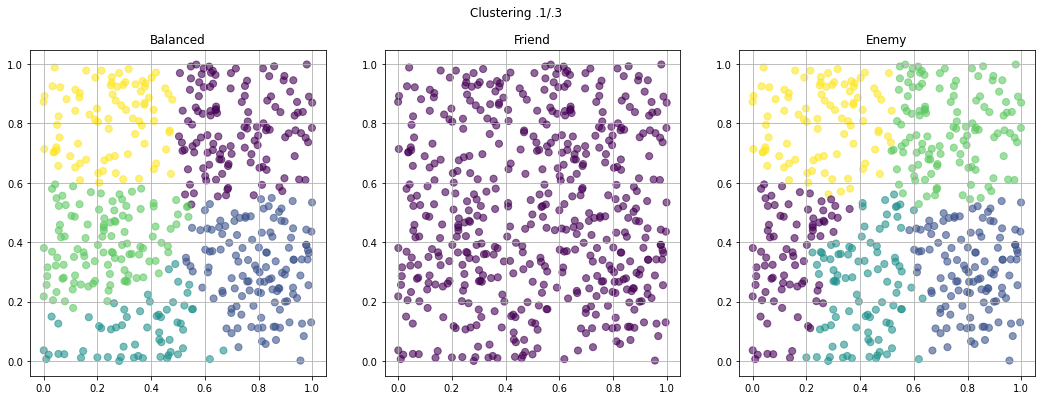

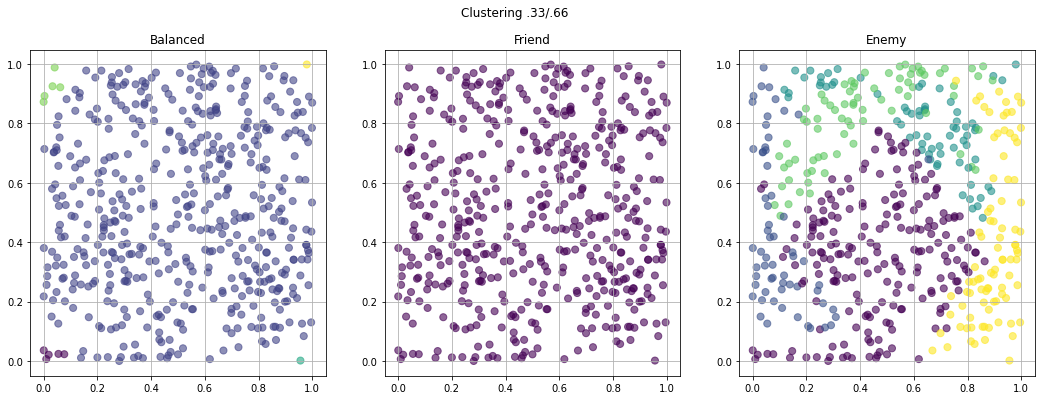

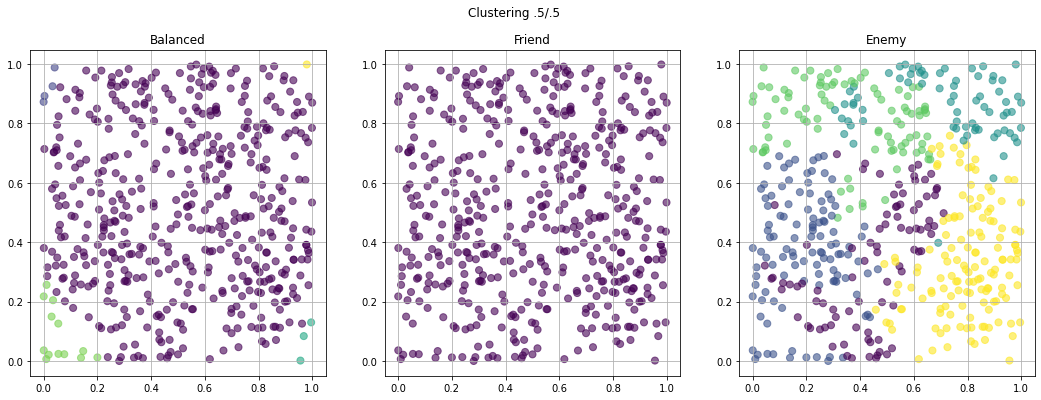

In [3]:
"""Comparing different levels of euclidean relations on noise"""
n=500 # No of Agents
m=5 # No of Coalitions


agents = generate_agents(n,2)
initial_clustering = {i: i % m for i in range(len(agents))}
friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
friend_graph_b, enemy_graph_b = create_graphs_euclid(agents,0.33,0.66)
friend_graph_c, enemy_graph_c = create_graphs_euclid(agents,0.5,0.5)



lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='E')

lp_b_b = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='B')
lp_b_f = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='F')
lp_b_e = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='E')

lp_c_b = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='B')
lp_c_f = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='F')
lp_c_e = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='E')


plot_stuff(agents, lp_a_b, lp_a_f, lp_a_e,"Clustering .1/.3",
           title_1='Balanced', title_2='Friend', title_3='Enemy')

plot_stuff(agents, lp_b_b, lp_b_f, lp_b_e,"Clustering .33/.66 ",
            title_1='Balanced', title_2='Friend', title_3='Enemy')

plot_stuff(agents, lp_c_b, lp_c_f, lp_c_e,"Clustering .5/.5 ",
            title_1='Balanced', title_2='Friend', title_3='Enemy')




149
140
147
144
150
142
150
150
149


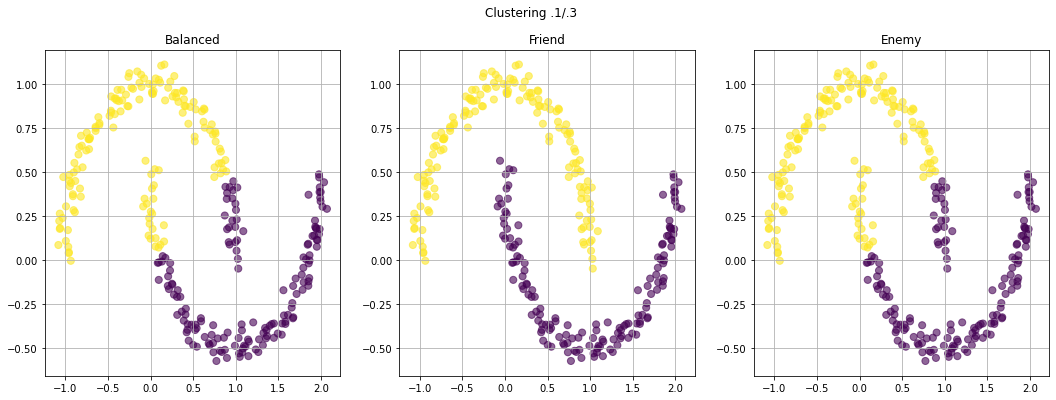

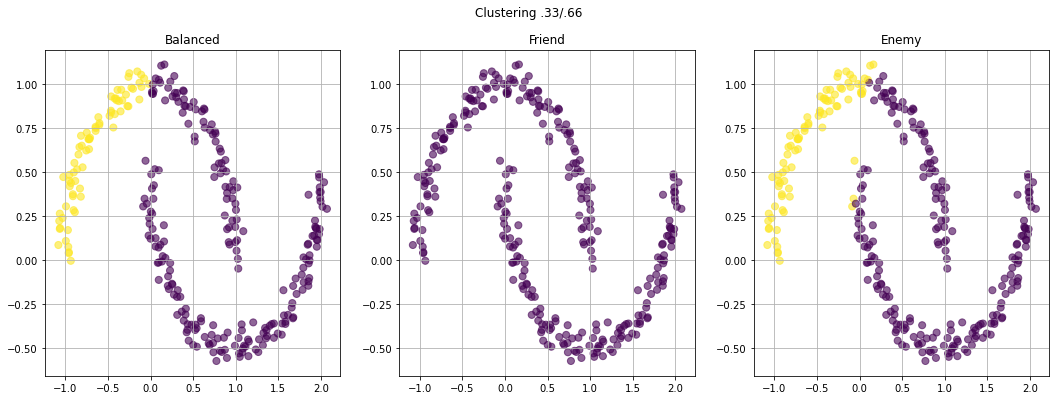

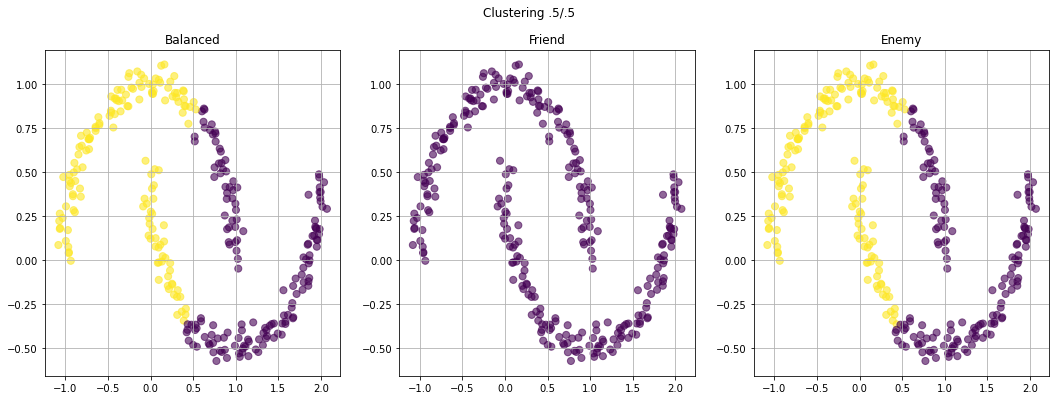

In [4]:
"""Comparing different levels of euclidean relations on moons"""
n=300 # No of Agents
m=2 # No of Coalitions


agents,_ = make_moons(n_samples=n, noise=0.05)
initial_clustering = {i: i % m for i in range(len(agents))}
friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
friend_graph_b, enemy_graph_b = create_graphs_euclid(agents,0.33,0.66)
friend_graph_c, enemy_graph_c = create_graphs_euclid(agents,0.5,0.5)



lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='E')

lp_b_b = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='B')
lp_b_f = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='F')
lp_b_e = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='E')

lp_c_b = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='B')
lp_c_f = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='F')
lp_c_e = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='E')


plot_stuff(agents, lp_a_b, lp_a_f, lp_a_e,"Clustering .1/.3",
           title_1='Balanced', title_2='Friend', title_3='Enemy')

plot_stuff(agents, lp_b_b, lp_b_f, lp_b_e,"Clustering .33/.66 ",
            title_1='Balanced', title_2='Friend', title_3='Enemy')

plot_stuff(agents, lp_c_b, lp_c_f, lp_c_e,"Clustering .5/.5 ",
            title_1='Balanced', title_2='Friend', title_3='Enemy')


182


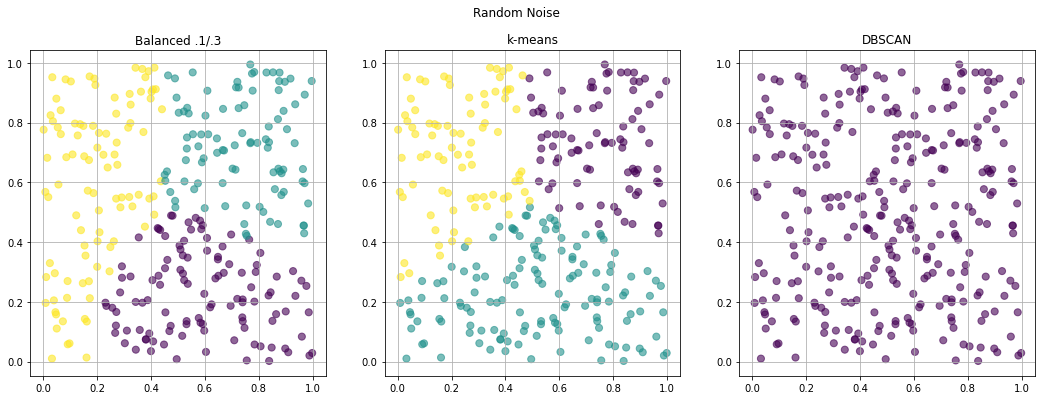

214


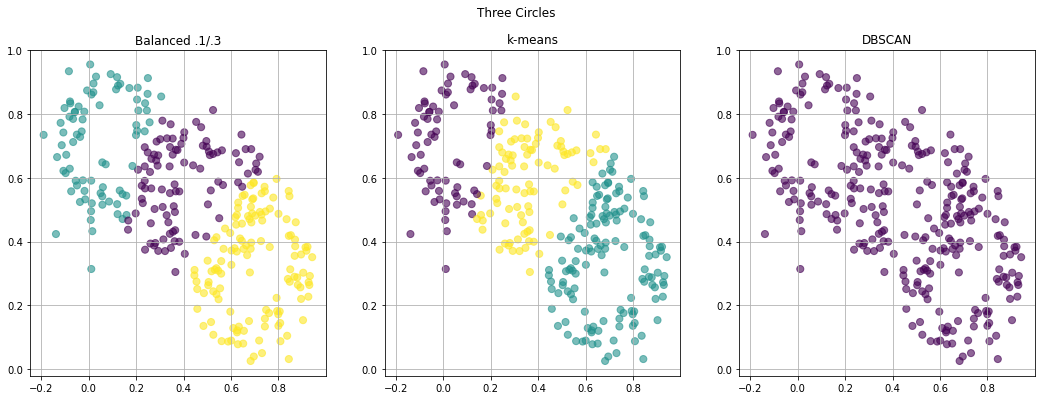

139


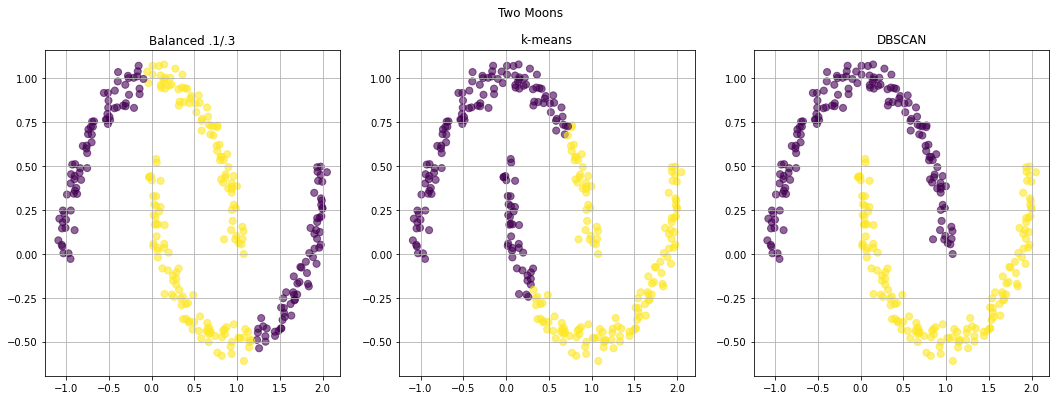

In [5]:
"""Comparing the Balanced-lp-heuristic to k-means and DBSCAN"""
n=300 # No of Agents
m=3 # No of Coalitions
kmeans = KMeans(n_clusters = m)
dbscan = DBSCAN(eps=0.2, min_samples=5)

agents = generate_agents(n,2)

kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}


friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')

plot_stuff(agents, lp_a_b, kmeans_labels, dbscan_labels,"Random Noise",
          title_1='Balanced .1/.3', title_2='k-means', title_3='DBSCAN')


agents = my_make_circles(n)

kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}


friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)

lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')

plot_stuff(agents, lp_a_b, kmeans_labels, dbscan_labels,"Three Circles",
          title_1='Balanced .1/.3', title_2='k-means', title_3='DBSCAN')

n=300 # No of Agents
m=2 # No of Coalitions
kmeans = KMeans(n_clusters = m)

agents,_ = make_moons(n_samples=n, noise=0.05)


kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}

friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')

plot_stuff(agents,lp_a_b, kmeans_labels, dbscan_labels, title="Two Moons",
          title_1='Balanced .1/.3', title_2='k-means', title_3='DBSCAN')

200


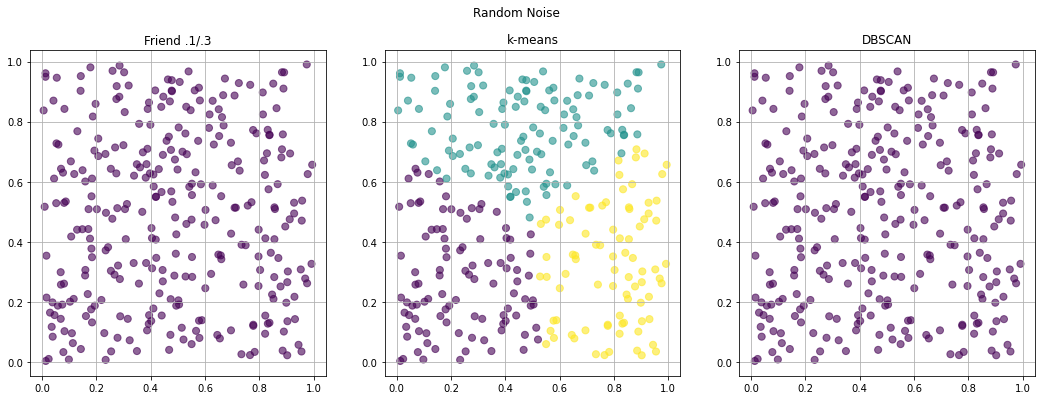

200


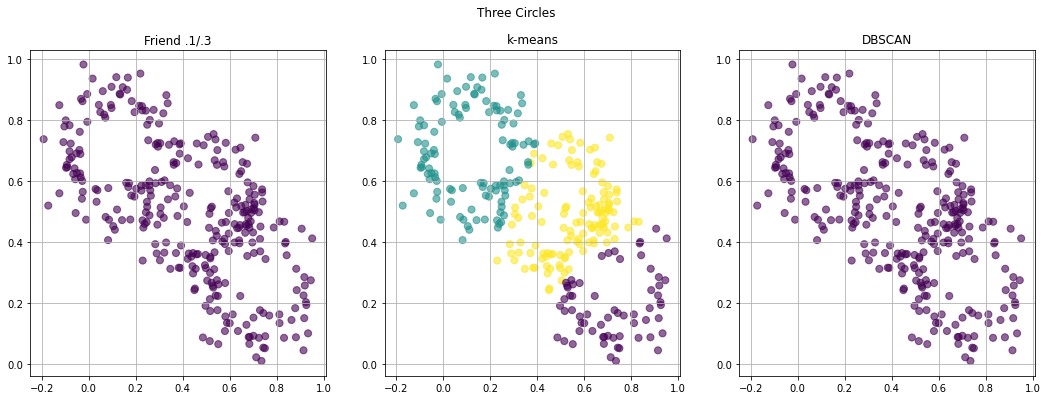

140


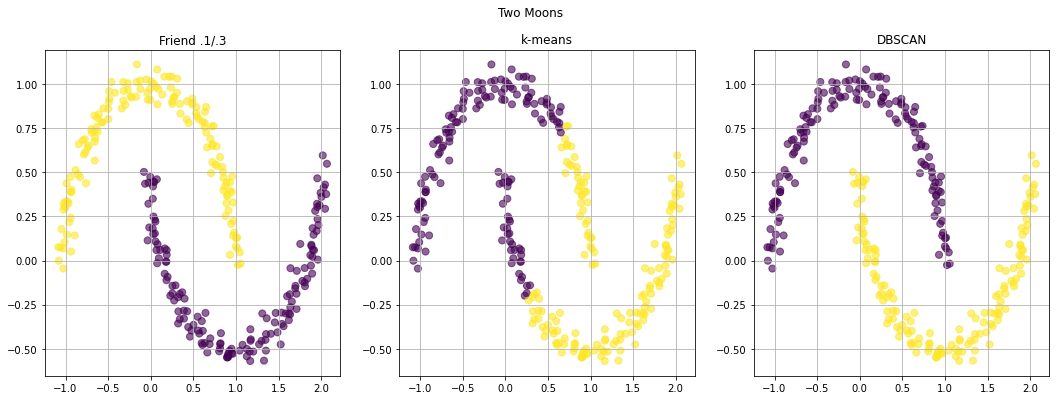

In [8]:
"""Comparing the Friend-lp-heuristic to k-means and DBSCAN"""
n=300 # No of Agents
m=3 # No of Coalitions
kmeans = KMeans(n_clusters = m)
dbscan = DBSCAN(eps=0.2, min_samples=5)

agents = generate_agents(n,2)

kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}


friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')

plot_stuff(agents, lp_a_b, kmeans_labels, dbscan_labels,"Random Noise",
          title_1='Friend .1/.3', title_2='k-means', title_3='DBSCAN')


agents = my_make_circles(n)

kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}


friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)

lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')

plot_stuff(agents, lp_a_b, kmeans_labels, dbscan_labels,"Three Circles",
          title_1='Friend .1/.3', title_2='k-means', title_3='DBSCAN')

n=300 # No of Agents
m=2 # No of Coalitions
kmeans = KMeans(n_clusters = m)

agents,_ = make_moons(n_samples=n, noise=0.05)


kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}

friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')

plot_stuff(agents,lp_a_b, kmeans_labels, dbscan_labels, title="Two Moons",
          title_1='Friend .1/.3', title_2='k-means', title_3='DBSCAN')

In [20]:
G = nx.karate_club_graph()
initial_clustering = {i : i for i in range(34)}

agents = G.nodes()

shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
G_F = nx.Graph()
G_E = nx.Graph()

# Add nodes to G_F and G_E
G_F.add_nodes_from(G.nodes())
G_E.add_nodes_from(G.nodes())

# Populate G_F and G_E based on shortest path lengths
for u in G.nodes():
    for v in G.nodes():
        if u < v:  # Avoid duplicate edges since the graph is undirected
            path_length = shortest_paths[u][v]
            if path_length <= 2:
                G_F.add_edge(u, v)
            elif path_length >= 3:
                G_E.add_edge(u, v)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')

36
33
30


In [24]:
lp_a_b

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 15,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 15,
 15: 15,
 16: 16,
 17: 1,
 18: 15,
 19: 1,
 20: 15,
 21: 1,
 22: 15,
 23: 15,
 24: 25,
 25: 25,
 26: 15,
 27: 15,
 28: 15,
 29: 15,
 30: 15,
 31: 1,
 32: 15,
 33: 15}

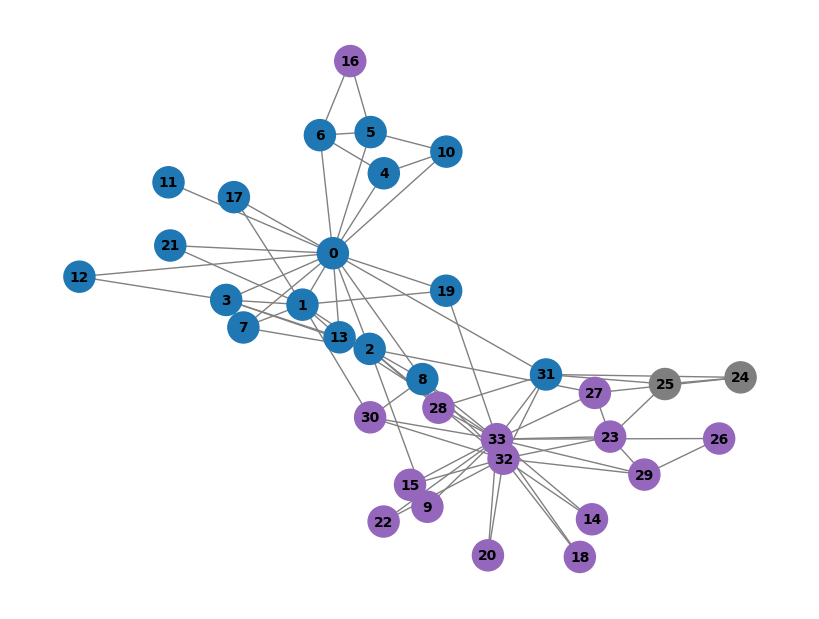

In [23]:
import matplotlib.pyplot as plt
clustering = lp_a_b
unique_classes = clustering
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Generate distinct colors
class_to_color = {cls: colors[i] for i, cls in enumerate(unique_classes)}
node_colors = [class_to_color[clustering[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.spring_layout(G, seed=42), node_color=node_colors, with_labels=True, 
        edge_color='gray', node_size=500, font_size=10, font_weight='bold')
plt.show()

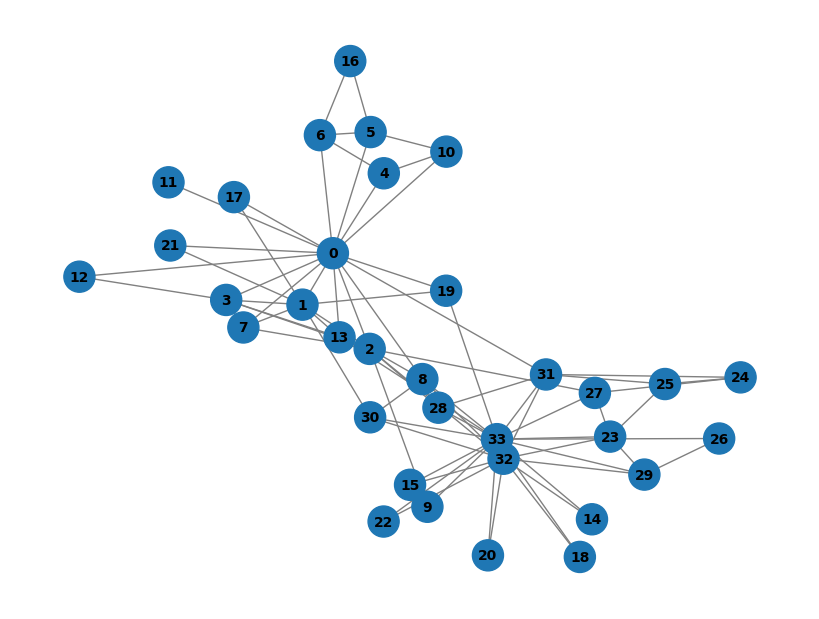

In [21]:
import matplotlib.pyplot as plt
clustering = lp_a_f
unique_classes = clustering
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Generate distinct colors
class_to_color = {cls: colors[i] for i, cls in enumerate(unique_classes)}
node_colors = [class_to_color[clustering[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.spring_layout(G, seed=42), node_color=node_colors, with_labels=True, 
        edge_color='gray', node_size=500, font_size=10, font_weight='bold')
plt.show()

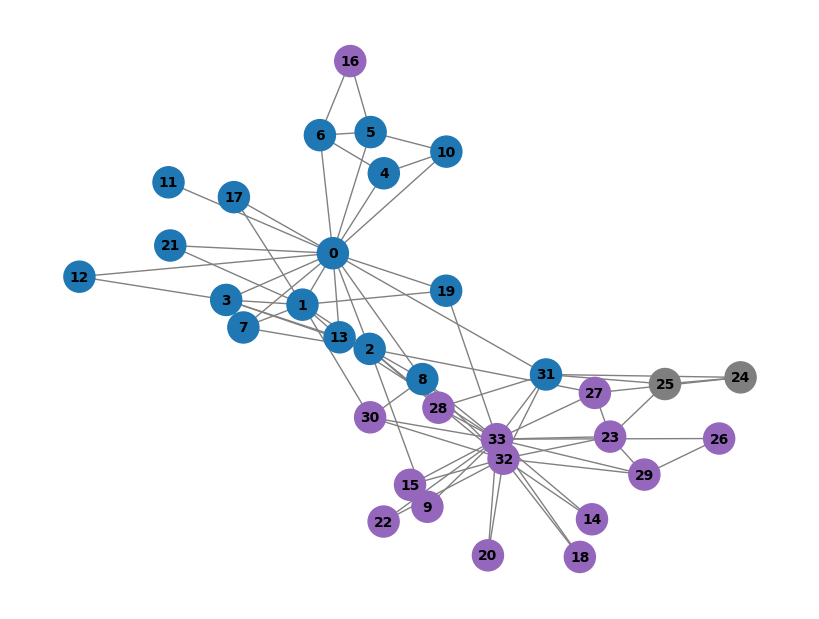

In [22]:
import matplotlib.pyplot as plt
clustering = lp_a_e
unique_classes = clustering
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Generate distinct colors
class_to_color = {cls: colors[i] for i, cls in enumerate(unique_classes)}
node_colors = [class_to_color[clustering[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.spring_layout(G, seed=42), node_color=node_colors, with_labels=True, 
        edge_color='gray', node_size=500, font_size=10, font_weight='bold')
plt.show()